# 11. 기계 번역이 걸어온 길
## 11-1. 들어가며

### 번역 모델 발전 과정
- 규칙 기반 기계 번역 -> 통계적 기계 번역 -> 구문 기반 기계 번역 -> 신경망 기계번역

### 신경망 기계 번역 
- 훈련된 모델이 번역 문장을 생성하는 법
  - Greedy Decoding
  - Beam Search
  - Sampling
  
- 주어진 데이터로 더 높은 성능 만드는 방법
  - Data Augmentation
  - Lexical Substitution(어휘 대체)
    - 동의어 기반 대체
    - Embedding 활용 대체
    - TF-IDF 기반 댗체
  - Back Translation
  - Random Noise Injection
    - 오타 노이즈 추가
    - 공백 노이즈 추가
    - 랜덤 유의어 추가
    
### 자연어 처리 성능 측정 지표
- BLEU
- GLUE: 자연어 이해 평가 지표

### 챗봇
- 검색 기반 모델, 생성 모델
- Open Domain, Closed Domain
- 신경 써야 할 부분
  - 200ms
  - 시공간을 담은 질문
  - 페르소나
  - 대화의 일관성
- 대표적 챗봇(딥러닝 기반)
  - Meena: evolved Transformer
  - Blemder


### 학습 목표
1. 번역 모델이 발전해 온 과정을 살펴본다.
2. 번역을 생성하는 여러 가지 방법을 이해한다.
3. 주어진 데이터로 더 높은 성능을 만들어 내는 법을 배운다.
4. 자연어 처리의 성능을 측정하기 위한 지표를 배운다.

## 1-2. 번역의 흐름
### 규칙 기반 기계 번역
- __규칙 기반 기계 번역(RBMT, Rule-Based Machine Translation)__     
번역할 때 경우의 수를 직접 정의해 주는 방식. 언어학을 기반으로 규칙을 만들기 때문에 개발 과정에 언어학자가 동반되어야만 한다. 

- 1954년 1월 7일 '조지타운-IBM 실험': 미국의 조지타운대와 IBM이 직접 정의한 언어 규칙, 60개의 러시아어 문장을 영어로 번역하는 데에 성공함. IBM 701 컴퓨터, 250개 단어와 6개의 문법 규칙이 프로그래밍된 컴퓨터 사용.  

참고 : [[역사 속 사진] 1954년 1월 7일, 기계 번역의 역사를 만든 '조지타운-IBM 실험' 시연](https://m.blog.naver.com/newheater/221763031420)

- 규칙 기반 기계 번역의 한계    
1. 규칙에 없는 문장이 들어올 경우 번역이 불가능하고 유연성이 떨어진다.
2. 모든 규칙을 정의하는 과정이 너무 복잡하고 시간이 오래 걸린다.  

### 통계적 기계 번역
- 통계적 기계 번역(SMT, Statistical Machine Translation): 1988년에 IBM이 _Model 1_ 을 통한 새로운 번역 방식. 수많은 데이터로부터 통계적 확률을 구해 번역을 진행함. 

통계적 기계 번역은 통계적 언어 모델을 기반으로 동작한다.

#### 정리

- [위키독스: 통계적 언어 모델](https://wikidocs.net/21687): SLM
1. 조건부 확률    
n개의 조건부 확률(연쇄법칙)      
$P(w_1, w_2, ... , w_n) = P(x_1)P(x_2|x_1)P(x_3|x_1, x_2)...P(x_n|x_1, ..., x_{n-1})$

2. 문장에 대한 확률       
각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어이고, 모든 단어로부터 하나의 문장이 완성된다. 그러므로 문장의 확률을 구하려면 조건부 확률을 사용해야 한다. 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성된다. 즉 문장의 확률을 구하려면 각 단어에 대한 예측 확률들을 곱한다. 

- 문장 'An adorable little boy is spreading smiles'의 확률   
P(An adorable little boy is spreading smiles) = P(An)P(adorable|An) P(little)P(An adorable)P(boy)P(An adorable little)P(is|An adorable little boy)P(spreading|An adorable little boy is)P(smiles|An adorable little boy is spreading)


Q1. 아래와 각 단어에 대한 예측 확률이 주어졌을 때, 문장 "나는 커피를 마신다" 에 대한 확률을 구해보세요. 

P(는|나) = 0.9      
P(커피|나는) = 0.5    
P(밥|나는) = 0.3      
P(를|나는 커피) = 0.95    
P(마신다|나는 커피를) = 0.73     
P(먹는다|나는 밥을) = 0.81

P(나는 커피를 마신다) = P(나)P(는|나)P(커피|나는)P(를|나는 커피)P(마신다|나는 커피를) = P(나) x 0.9 x 0.5 x 0.95 x 0.73 = P(나) x 0.312075

예시답안     
P(나는 커피를 마신다)     
= P(는|나) x P(커피|나는) x P(를|나는 커피) x P(마신다|나는 커피를)    
= 0.9 x 0.5 x 0.95 x 0.73       
= 0.312075      

- 통계적 모델의 장점과 한계점

- 장점:
  - 일일이 규칙을 정의해야 하는 규칙 기반 모델보다 개발에 대한 Cost가 훨씬 적다.
  - 많은 데이터가 뒷받침될 경우, 훨씬 더 유연한 문장 생성이 가능하다(많이 사용되는 문장).


- 한계점:
  - 본 적이 없는 문장에 대한 모델링이 불가능하다. 즉, 데이터 의존적이다.
  - 문장의 어순에 대한 고려가 없기 때문에 다소 어색한 문장이 생성될 수 있다.

- 희소 문제(sparsity problem)   
목표하는 문장이 훈련 데이터에 없었던 시퀀스일 경우 올바른 문장임에도 확률이 0으로 정의되는 문제이다. 즉 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제이다.

- 통계적 언어 모델: __"문장이 존재할 확률을 측정한다."__

- SMT의 동작 과정    
번역은 자연스러운 문장을 생성하는 것뿐만 아니라 번역문의 문법 구조도 고려해야 하기 때문에 단순히 P(Target | Source) 만을 고려해서는 안 된다. __원문과 번역문, 각 단어 간의 매핑 관계__ 를 추가로 고려해야 하는데, 그 관계를 __정렬(Alignment)__ 이라고 부른다.

![](https://images.velog.io/images/guide333/post/005170fd-2648-4c74-9437-9562c49955de/Screenshot%20from%202021-04-22%2010-14-56.png)

- 정렬
  - 퍼틸리티(fertility): 원문의 각 단어가 번역 후에 몇 개의 단어로 나타나는지를 의미하는 값
  - 왜곡(Distortion): 원문의 단어가 번역문에서 존재하는 위치

- 그림 설명    
  
  - ```Everyone```의 퍼틸리티는 2, ```Clapped``` 의 퍼틸리티는 3. ```to```, ```the``` 의 퍼틸리티는 0.        
  - 퍼틸리티에 대한 확률: p(n|w) (n은 퍼틸리티 값, w는 원문의 단어). ```music``` 은 높은 확률로 ```음악``` 으로만 번역되므로 p(1|music) = 0.9 정도로 표현할 수 있다.

  - ```Clapped```는 ```손뼉(6) 을(7) 쳤다(8)``` 로 번역되므로 ```Clapped```의 왜곡은 (6, 7, 8)
  - 왜곡에 대한 확률: p(t|s, l) (t은 번역문에서 각 단어의 위치, s는 원문에서 각 단어의 위치, l은 번역문의 길이). 
  - ```Everyone(1)``` 으로 시작하는 문장은 ```모두(1) / 가(2)``` 라고 번역될 확률이 높으므로 p(1|1, 8) x p(2|1, 8)는 높을 것을 추측할 수 있다.

통계적 언어 모델에서 파생된 확률에 위 모든 확률을 곱하여 학습하는 것이 바로 __통계적 기계 번역__ 이다.

__예문__

```PYTHON
E: Everyone(1, 2) clapped(6, 7, 8) in(4) time(5) to(·) the(·) music(3)
-> K: 모두(1) 가(2) 음악(3) 에(4) 맞춰(5) 손뼉(6) 을(7) 쳤다(8)
```

__수식__

p(E|K) = 각 단어의 (fertility에 대한 확률 x 왜곡에 대한 확률 x P(번역문 단어|원문 단어)) 
= 각 단어의 (p(n|w) x p(t|s, l) x P(번역문 단어|원문 단어))

대응하는 번역문과 원문 단어가 여러 개라면 각각 곱해줌

```python
p(E|K) =
{p(2|Everyone) x p(1|1, 8) x p(2|1, 8) x p(모두|Everyone) x p(가|Everyone)} x
{ /*  수식을 작성하세요! */ } x
{p(1|in) x p(4|3, 8) x p(에|in)} x
{p(1|time) x p(5|4, 8) x p(맞춰|time)} x
{p(0|to) x} x
{p(0|the) x} x
{p(1|music) x p(3|7, 8) x p(음악|music)}
```

Q4. 위 수식의 빈칸에 들어갈 식을 써주세요.
   
p(3|clapped) x p(6|2, 8) x p(7|2, 8) x p(8|2, 8) x p(손뼉|clapped) x p(을|clapped) x p(쳤다|clapped)

통계 기반 기계 번역 모델은 단 __하나의 단어__ 를 기반으로 정렬 값을 구하기 때문에 ```in time to``` 를 묶어서 한 번에 ```~에 맞춰``` 로 번역할 수 없다. 

두 단어 이상으로 정렬을 구하는 __구문 기반 번역(PBMT, Phrase Based Machine Translation)__ 이 등장하여 꽤나 최근인 2006년까지도 사용되었다. 또 규칙 기반 번역과 결합하여 하이브리드로 사용된 사례도 있었다.

### 신경망 기계 번역
__신경망 기계 번역(Neural Machine Translation)__ : seq2seq나 transformer는 신경망 기계 번역에 활용되는 대표적인 모델. 

## 11-3. 지적 생성을 위한 넓고 얕은 탐색 (1) Greedy Decoding

지금까지 몇몇 예제와 프로젝트를 하며 문장을 생성했던 경험이 있으시죠? 잠시 이전에 함께 다루었던 예제코드를 살펴봅시다.

```python
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)

    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor)
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]

        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated
```

이 함수는 훈련시킨 모델이 문장을 생성할 수 있게 해주는 함수이며 주목해야 하는 부분은 바로 __단어를 결정하는 부분__ 이다!

```python
predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]
```

모델이 예측한 ```predict``` 값을 Softmax를 통해 확률값으로 변환한 후, __가장 높은 확률을 갖는 단어가 다음 단어로 결정__ 하는 부분이다. 이것은 __탐욕 알고리즘(Greedy Algorithm)__ 이 사용된 것이다. 탐욕적인 방법으로 문장을 Decoding 하므로 기계 번역에서는 이를 __Greedy Decoding__ 이라고 한다.

- [[알고리즘] Greedy Algorithm (탐욕 알고리즘)](https://janghw.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-Greedy-Algorithm-%ED%83%90%EC%9A%95-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

>미리 정한 기준에 따라 매번 가장 좋아 보이는 답을 선택하는 알고리즘. 최적화 문제를 푸는 데 사용한다. 근시안적으로 해를 구할 때 가장 최적인 해를 구한다. 동적 계획법보다 효율적이나 동적 계획법처럼 반드시 최적의 해를 구해준다는 보장은 없다. 

탐욕적인 방법은 효율적이지만 최적의 해를 구해준다는 보장이 없다. 즉 최고의 확률을 갖는 단어가 최고의 번역이 아니다. 

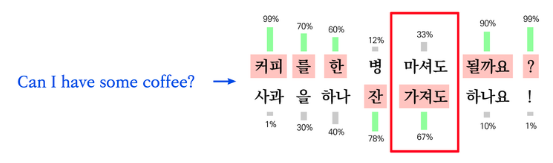

문장이 존재할 확률을 구할 있다. 실제 세계에서는 ```커피를 한 잔 가져도 될까요?``` 보다 ```커피를 한 잔 마셔도 될까요?``` 가 높은 확률로 존재할 것이다. 하지만 훈련 데이터가 __실제 세계의 모든 데이터를 포함할 수는 없기 때문에,__ ```have``` 가 ```마시다``` 로 사용되는 경우가 훈련 데이터에 적거나 없었다면 탐욕적인 방법은 ```have``` 를 __가장 높은 확률을 갖는__ ```가지다``` 로 번역할 수밖에 없다. 

이 문제를 해결하기 위해 __단어 사전으로 만들 수 있는 모든 문장__ 을 만든 후, 실제 세계에 존재하는 우리가 직접 고르는 방법이 사용될 수 있다. 그러나  예를 들어 1,000개의 단어를 갖는 사전으로 3개 단어 문장 하나를 만든다면 1,000,000,000개 문장이 필요하다는 단점이 있다.

## 11-4. 지적 생성을 위한 넓고 얕은 탐색 (2) Beam Search
모든 문장을 다 만들어보는 것은 $O(V^L)$의 복잡도를 갖는다는 것을 제외하곤 좋은 방법이다. 확실히 원하는 문장이 만들어질 거라는 보장이 있기 때문이다. 

### Beam Search
지금 상황에서 가장 높은 확률을 갖는 Top-k 문장만 남긴다. 

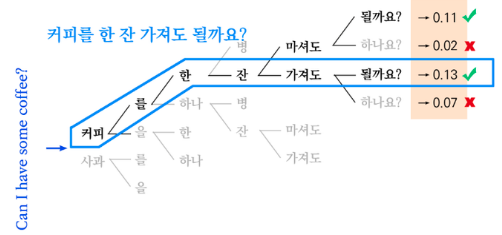

- Beam Size(혹은 Beam Width): 기억할 상위 문장 k개 

위 그림은 Beam Size를 2로 하는 Beam Search이다. Beam Size는 연산량과 성능 간의 Trade-off 관계를 가지고 있다. 자원이 무한하다면 __Beam Size를 키우면 키울수록 성능이 좋아진다__. 직접 실험을 통해 찾아보는 것이 좋으나 대체로 ```5``` 나 ```10``` 을 적합한 값으로 택한다. 최종적으로 만들어진 문장들(2번째, 3번째, ... k번째로 높은 확률의 단어로 만든 문장)의 확률의 총합을 구해 가장 높은 값을 갖는 문장을 생성한다.

확인하고자 했던 ```커피를 마셔도 될까요?``` 에 더하여 ```마셔를 가져도 될까요?``` 까지 확인할 수 있었다. 굳이 고정된 개수의 문장을 얻지 않아도 된다면 적당한 __Beam Size를 설정해 준 후 Score를 기준으로 필터링__ 하는 방법도 좋다. 

>❗유의        
Beam Search는 사람이 직접 좋은 번역을 고를 수 있게 상위 K개의 결과를 보여줄 뿐이라서 학습에 직접적으로 적용할 수는 없다. 즉 모델 학습 단계에서 Beam Search를 사용하지는 않습니다.

## 11-5. 지적 생성을 위한 넓고 얕은 탐색 (3) Sampling
__Sampling__은 자주 사용되는 방법은 아니지만 굉장히 흥미롭다. 다음의 단어로 나올 확률이 높은 단어를 선택하는 방식은 동일한 입력에 대해 늘 동일한 결과가 만들어진다.

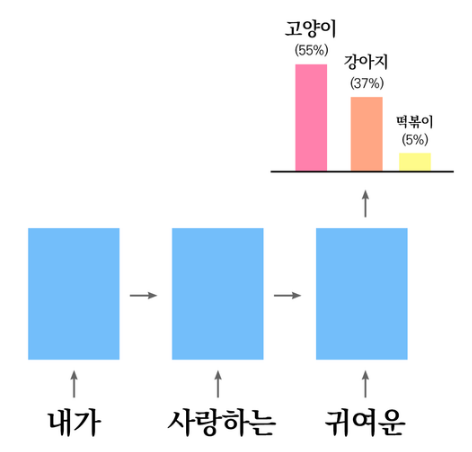

매번 새로우며 의미가 유지되는 문장을 만들기 위해 Sampling을 사용할 수 있다. 언어 모델은 반복적으로 다음 단어에 대한 확률 분포를 생성하기 때문에 그 확률 분포를 기반으로 랜덤하게 단어를 뽑는다. 위 예시를 따라서 100문장을 만들면 이상적인 경우 55개의``` 내가 사랑하는 귀여운 고양이```, 37개의 ```내가 사랑하는 귀여운 강아지```… 와 같이 문장이 생성된다. 높은 확률을 갖는 단어를 택하는 경우가 가장 많기 때문에 지나치게 뜬금없는 문장이 생성되지는 않는다.

>__"Sampling은 대체 어디에 사용해야 하지..?"__
>
>Sampling은 간혹 정말 난해한 문장을 생성할 수도 있기 때문에 __실제 서비스에서는 거의 사용되지 않고 모델을 학습시킬 때 사용한다. Back Translation(역번역)__ 이 대표적인 사례이다. 또한 강화 학습의 입실론 그리디(E-Greedy)와도 궤를 함께하기 때문에 __자연어 처리에 강화 학습을 적용한 경우__에 등장하기도 한다.

## 11-6. Data Augmentation
### Data Augmentation
'데이터 증가', '데이터 확대' 등으로 직역, 훈련 데이터를 수십 배까지도 부풀리는 기술. 주로 이미지 처리 영역에서 많이 사용된다.

#### 정리
- [Data Preprocessing & Augmentation](https://nittaku.tistory.com/272)  
- Augmentation의 장점       
1. 성능이 좋아짐 2. 쉽고 패턴이 정해져 있음

- 자주 사용하는 방식   
1. RGB 값을 각각 빼서 RGB의 평균을 0으로 만듬 -> train 시 loss 수렴이 빨라짐    
2. 좌우 반전
3. 다양한 사이즈 넣기

- 총 9가지의 Augmentation 기법
  - 좌우 반전 (Flipping과 중복): 이미지를 좌우로 반전시킨다.
  - Crop: 이미지의 특정 부분을 잘라낸다.
  - 밝기 조절: 이미지의 밝기를 변화시킨다.
  - Rotation: 이미지를 0 ~ 360도 회전시킨다.
  - Shifting: 이미지 상/하/좌/우를 약 10px 움직인다. 끝단이 잘려 나가는 효과가 있다.
  - Rescaling: 이미지를 1.0 ~ 1.6배 키운다.
  - Flipping: 이미지를 상하 / 좌우 반전을 한다. (좌우반전을 많이 사용)
  - Shearing: 약 -20 ~ 20도 정도로 이미지를 찌그러트린다.
  - Stretching: 이미지를 가로 / 세로 약 1.0 ~ 1.3배 늘린다.

이미지 데이터는 늘리고 돌리고 찌그러트리고… 어떤 변화를 시켜도 __왜곡이 크지 않고 심지어 일괄적으로 처리할 수 있다__ 는 장점이 있다. 하지만 문장 데이터에 적용이 가능한 Augmentation 기법은 쉽게 떠오르지 않지만 방법은 있다.

## 11-7.  Lexical Substitution

- NLP에서 사용하는 Data Augmentation의 방법 -  Lexical Substitution

- Lexical Substitution('어휘 대체')의 3가지 방식

### 동의어 기반 대체
- 시소러스(Thesaurus): 어떤 단어의 동의어나 유의어를 집중적으로 구축해놓은 사전.
- 동의어 기반 대체는 이 시소러스를 활용한 방법, 대표적인 시소러스는 워드넷(WordNet)이 있다. 

- 워드넷을 활용해 단어간 유사도를 비교할 수 있다.   
각 최하단 노드 간 최단 거리를 알 수 있고 이를 유사도로 치환해 활용할 수 있다. 

- 동의어 기반 대체(시소러스)의 단점    
  - 사전을 구축하는데 큰 비용과 시간이 소요된다. 
  - 상위어와 하위어가 잘 반영된 사전이어야 한다. 

- 한국어로 구축된 워드넷         
  - [부산대학교의 KorLex](http://korlex.pusan.ac.kr/)
  - 카이스트의 [Korean WordNet(KWN)](http://wordnet.kaist.ac.kr/)

동의어 기반 대체를 통한 Augmentation

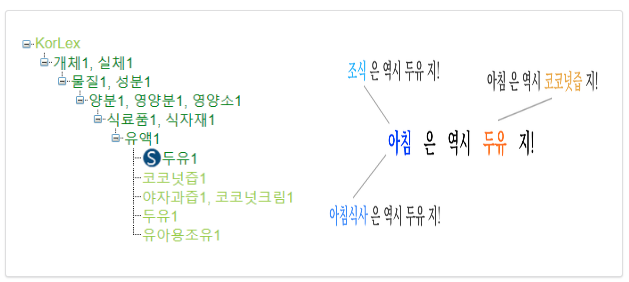

동의어를 기반으로 대체하는 것은 아주 좋은 방법이지만, 규칙 기반 기계 번역처럼 모든 것을 사람이 정의해야 한다는 것이 단점이다. 

### Embedding 활용 대체
__Pre-training Word Embedding__ 을 활용하는 방법이 보다 편리하다. Word2Vec이나 GloVe 등의 기법들을 통해 학습된 Embedding은 유사한 단어들끼리 비슷한 공간에 밀집되어 있다. Embedding의 유사도를 기반으로 단어를 대체하면 훨씬 편리하다.

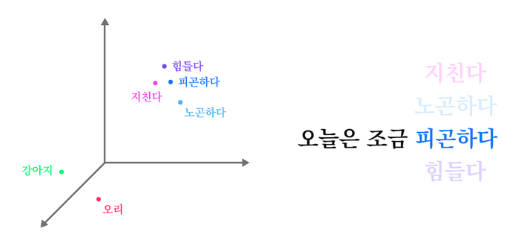

```gensim``` 라이브러리를 활용하면 이 방법은 아주 쉽게 사용할 수 있다. 단어를 유사도 순으로 정렬해 보여주는 ```most_similar()``` 함수 사용.

### TF-IDF 기반 대체

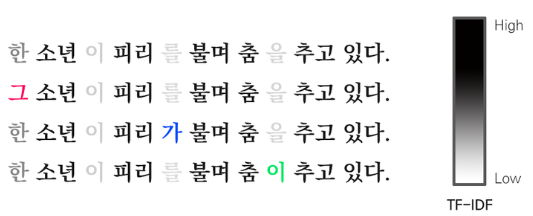

__TF-IDF__ 는 여러 문서를 기반으로 단어마다 중요도를 부여하는 알고리즘이다. 문서의 핵심이 되는 ```소년```, ```피리``` 같은 단어들은 높은 TF-IDF 값을 부여받고, ```한```, ```를```과 같은 단어들은 낮은 TF-IDF 값을 갖는다. 이때, __낮은 TF-IDF 값을 갖는 단어들__ 은 핵심 단어가 아니기 때문에 __다른 단어로 대체해도 문맥이 크게 변하지 않는다__ 는 것에 주목한 아이디어이다. 

## 11-8. Back Translation
### Back Translation
단일 언어 데이터는 구하기 쉽고 많지만 병렬 쌍을 이룬 언어 데이터를 찾기는 어렵다는 문제를 해결하고자 등장했다. 번역 모델에 단일 언어 데이터를 학습시키는 방법으로, Encoder에는 Source 언어로 된 문장을, Decoder에는 Target 언어로 된 문장을 좀 더 훈련시키는 방법이다.

- [Back Translation 정리](https://dev-sngwn.github.io/2020-01-07-back-translation/)

- Synthetic Source Sentence를 생성하는 과정
       
S(Source)-T(Target) 병렬 말뭉치가 있다고 가정하면, S->T 방향 번역 모델 A를 학습함과 동시에 T->S 방향 번역 모델 B도 동시에 학습한다. 후에 T 언어로 된 단일 언어 데이터에 모델 B를 활용해 인공적인 S 언어 데이터를 생성하고 인공적인 S 언어 데이터와 T를 병렬 쌍으로 사용한다. 이때 생성되는 인공적인 S 언어 데이터가 Synthetic Source Sentence이다.

- Back Translation을 적용할 때, 가장 좋은 성능을 보인 문장 생성 기법
  - Beam Search에 Noise를 추가

- Back Translation이 효과적인 최소 데이터 수, Sampling 기법으로 생성한 Back Translation이 효과적인 최소 데이터 수
  - Back Translation: 데이터 수에 무관하게 효과적이다.
  - Sampling: 64만 개 이상

딥러닝 모델을 사용한다는 점이 이미지 처리에서 GAN으로 Augmentation 하는 것을 떠올리게 한다. Back Translation은 현재 번역 데이터셋으로 가장 유명한 _WMT2014_ 에서 
State-of-the-art 성능을 보인 알고리즘이다. 

## Random Noise Injection
데이터에 포함된 적당한 노이즈는 때때로 학습에 도움이 되므로 문장에 노이즈를 주는 것도 좋은 Augmentation 기법이다. 

- 노이즈를 주는 방법 3가지
  - 오타 노이즈 추가
  - 공백 노이즈 추가
  - 랜덤 노이즈 추가

### 오타 노이즈 추가
QWERTY 키보드 상에서 키의 거리를 기반으로 노이즈를 추가

```올 때 아이스크림 사와``` -> ```놀 때 아이스크림 사와``` 

### 공백 노이즈 추가


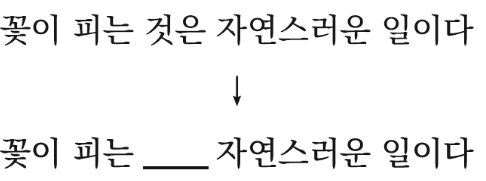

```_``` 토큰(Placeholder Token(공백 토큰))을 활용해 문장의 일부 단어를 공백 토큰으로 치환한다. __학습의 과적합을 방지하는 데에 좋은 효과__ 를 볼 수 있다.

### 랜덤 유의어 추가
주어진 문장에서 __불용어(Stop word)가 아닌 단어__를 랜덤하게 뽑은 후, __해당 단어와 유사한 단어를 골라__ 문장에 __아무렇게나 삽입__ 하는 방식이다.

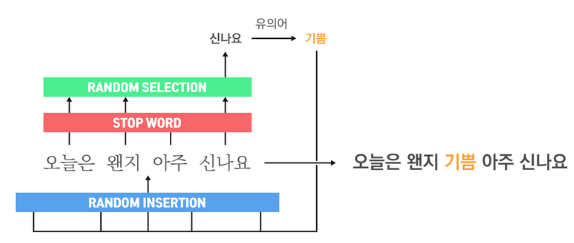

Lexical Substitution과 비슷한 느낌이지만 __원본 단어가 손실되지 않는다__. 유사어를 삽입하는 것이 __모델의 Embedding 층을 더 견고하게__ 만들어 줄 것이다.

## 11-10. 채점 - BLEU
직접 읽어보고 '좋다', '나쁘다' 라고 판단하는 것은 그럴 듯하지만 너무나도 주관적이므로 번역의 품질을 쉽고 빠르게 평가할 수 있는 객관적인 지표가 필요하다.

### BLEU(Bilingual Evaluation Understudy) Score
번역 평가 지표. '기계가 실제 번역을 얼마나 잘 재현했는가?' 를 평가하는 지표

#### 정리
- [BLEU Score](https://donghwa-kim.github.io/BLEU.html)

데이터의 X가 순서정보를 가진 단어들(문장)로 이루어져 있고, y 또한 단어들의 시리즈(문장)로 이루어진 경우에 사용, 

- n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision) 
- 문장길이에 대한 과적합 보정(Brevity Penalty)
- 같은 단어가 연속적으로 나올 때 과적합되는 것을 보정(Clipping)

![](https://images.velog.io/images/guide333/post/61293258-db2a-4a80-bd5b-7fb367d84a60/Screenshot%20from%202021-04-22%2016-38-36.png)

Q12. 아래 번역에 대한 BLEU Score를 계산하세요.

- Real: 귀여운 고양이 는 아침 식사 를 즐긴다
- Pred: 고양이 고양이 고양이 고양이
       
2-gram 이상에서 매치되는 경우가 없으므로 Precision 값은 0, 따라서 BLEU는 0점

Q13. 아래 번역에 대한 Precision^4를 계산하세요. (Clipping 포함)

- Real: __귀여운 고양이 는 아침__  식사 를 즐긴다
- Pred: __귀여운 고양이 는 아침 귀여운 고양이 는 아침__ 

예측된 문장에 중복된 단어: 귀여운-2, 고양이는-2, 는-2 아침-2. 실제 문장에 있는 중복되는 단어의 개수: 귀여운-1, 고양이-1, 는-1, 아침-1

- 보정 후 1-Gram: 4/8 = 1/2    
- 2-Gram: 3/7     
- 3-Gram: 2/6 = 1/3  
- 4-Gram: 1/5     
- 보정 후 Precision^4 = 1/70     

GLUE는 기계 번역 너머의 __자연어 이해(Natural Language Understanding)를 평가하기 위해 고안된 지표__

#### 정리
- [GLUE: 벤치마크를 통해 BERT 이해하기 - Programador | Huffon Blog](https://huffon.github.io/2019/11/16/glue/)

- GLUE(General Language Understanding Evaluation)   
모델들의 자연어 이해 능력을 평가하기 위해 고안되었고, BERT 같은 전이학습 모델을 평가하기 위한 필수적인 벤치마크이다. 

모델의 일반적인 언어 이해 능력과 fine-tuning을 통해 특정 태스크에 얼마나 좋은 성능을 낼 수 있는지 평가하기 위해 뉴욕대학교 연구진이 한 모델에 대해 여러 태스크를 훈련 및 평가할 수 있는 GLUE 데이터셋을 만들었다. 연구자들은 새로 연구한 모델을 GLUE 데이터셋에 훈련시킨 후, GLUE 내 11개의 태스크에 각각 점수를 매겨 최종 성능 점수를 계산하면 된다. GLUE 내 존재하는 모든 태스크를 모두 해결하면 모델은 어떤 구졸르 가져도, 내부적으로 어떤 연산을 취해도 문제가 되지 않는다. 

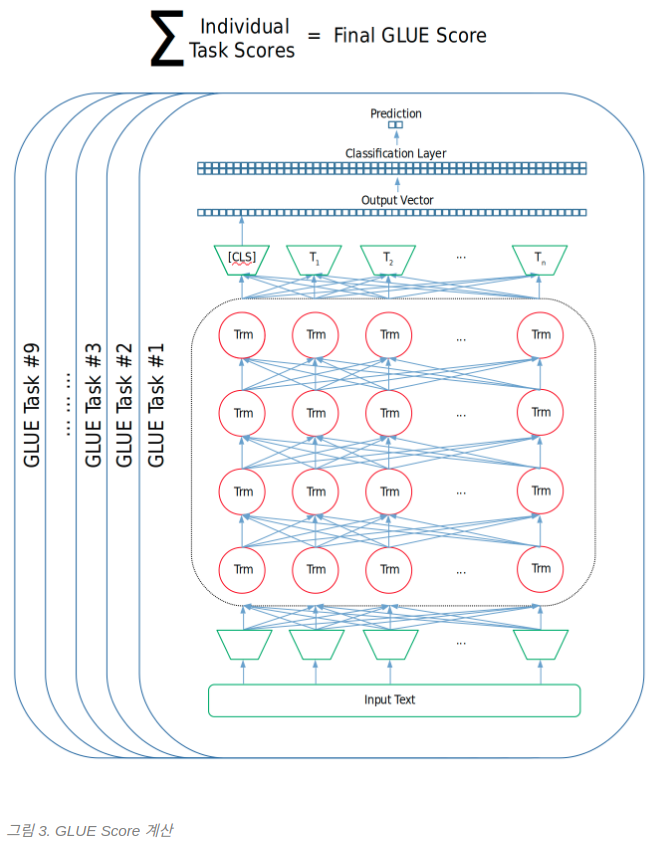


GLUE 데이터에 모델을 테스트할 때는 사전훈련에 사용되었던 분류층을 제거하고 GLUE 태스크를 수행하기 위한 레이어로 변경해주어야 한다. 자세한 내용은 블로그 다시 보기. 

## 11-11. 챗봇과 번역기
### 정리
- [[번역] 챗봇을 위한 딥러닝 1. 개요](https://norux.me/56)

#### 모델 분류   
- 검색기반 모델(Retrieval-based model)    
쉬움. 미리 정해진 응답들의 데이터를 사용, 인풋과 문맥에 기반해 적절한 응답을 휴리스틱적 방법으로 선택함. 휴리스틱 방법은 기반 매칭만큼 단순하고 머신 러닝 분류기의 조화만큼 복잡하다. 

장점: 문법적 오류가 없다.    
단점: 적절한 응답이 없으면 처리할 수 없다. 대화 초반에 언급된 내용인 문맥적 엔티티(Entity) 정보를 재위탁할 수 없다.

- 생성 모델(Generative model)    
어려움. 정해진 응답에 의존하지 않고 새로운 응답을 생성, 머신 번역 기술에 기반. 인풋에서 응답으로 '번역'함.

장점: 인풋의 엔티티 재위탁 가능, 사람과 이야기하는 느낌을 준다.   
단점: 트레이닝시키기 어렵다. 긴 문장에서의 문법 실수가 많다. 트레이닝 데이터 셋의 양이 매우 많다.
  
- Open Domain VS. Closed Domain    
  - 열린 도메인: 어려움. 목표나 의도가 없이 자유롭게 대화를 이어나감, 무한정의 주제에 유한의 특정 사실(지식)을 연결해야 합리적인 응답을 만들 수 있다.
  - 닫힌 도메인: 특정 목표만 수행, 인풋과 아웃풋이 다소 제한적. 예: 고객 지원이나 쇼핑 어시스트. 효율적을로 시스템의 특별한 태스크를 이용하면 된다. 유저들은 아무렇게나 대화를 하지만 시스템은 응답하지 않고 유저도 기대하지 않는다. 

### 생성 모델
번역 모델을 챗봇에 적용하는 아이디어는 Sequence-to-Sequence에서 시작한다. 

- Source언어: 질문
- Target 언어: 답변
- Source 문장을 Target 문장으로 번역: 질문에 답하기

Encoder는 Source 문장을 읽고 이해한 내용을 추상적인 고차원 문맥 벡터로 압축한다. Decoder는 Encoder가 만든 문맥 벡터를 바탕으로 Target 문장을 생성한다. 이 과정은 __Source 언어의 Embedding 공간 속 문장을 Target 언어의 Embedding 공간으로 매핑__ 한다고 할 수 있다. 수많은 데이터로 학습하여 좋은 성과를 나타낸다. 

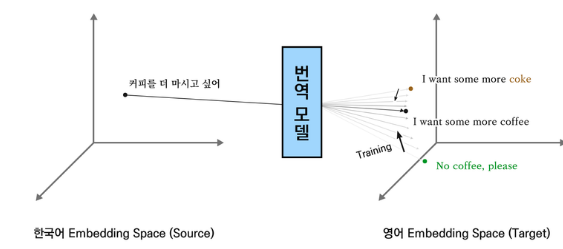

모든 Source 문장에 대해 매핑될 수 있는 고유한 Target 번역이 존재하기 때문에 가능하다. ```커피를 더 마시고 싶어``` 라는 문장을 영어로 올바르게 번역하는 경우의 수는 많아야 10개 정도 되고, 그 모든 경우의 수 또한 ```I want some more coffee``` 에서 크게 엇나가지 않는다. 이처럼 ```사과는 무슨 색이야?``` 에 대한 답변도 ```빨간색입니다``` 에 수렴하기 때문에 번역기를 챗봇으로 사용하는 게 가능하다.

## 11-12. 좋은 챗봇의 조건

### 200ms
200ms는 대화가 자연스럽게 느껴지는 답변의 공백 마지노선. 인간이 챗봇한테 말을 걸었을 때, 0.2초 이내에 답변이 나오는 것이 바람직하다. 스마트폰에 탑재된 인공지능 비서는  음성 인식, 답변 추론, 음성 생성 등 10개 이상의 모듈이 동작하기 때문에 각 모듈에 0.01초 수준의 시간이 주어진다고 한다.

### 시공간을 담은 질문
```오늘 무슨 요일이야?```, ```오늘 금천구 날씨 어때?``` 등과 같이 __특정 시공간에 의해 결정되는 질문__ (매일 답변이 변하는 질문)은 단순한 학습으로 답변할 수가 없어서 질문의 의도를 파악한 후, 다른 모듈로 연결하여 예외 처리를 한다. 

### 페르소나
__인격의 일관성 (Coherent Personality)__ 과 유사. 학습에는 주로 많은 사람들의 채팅 데이터를 모아서 사용하기 때문에 모델이 대답의 일관성을 갖는다는 것은 굉장히 어렵다. 이때의 일관성을 모델의 인격, __페르소나__ 라고 부른다. 

- [챗봇UX 4편, 챗봇이 다른 서비스와 다른 점, 페르소나](https://doc.danbee.ai/blog_005_UX04_persona.html)

- 챗봇의 페르소나를 설정할 때 고려해야하는 요소
       
페르소나는 제품이나 서비스 목적에 맞게 설정되어야 한다.              
목적, 개성이 나타날 수 있는 요소(성격, 목표, 동기부여, 니즈 등)

### 대화의 일관성
아직까지 사용자에 관한 정보를 기억하고 이를 활용하는 챗봇 모델은 없다. 대신 너무 __뜬금없는 대답을 막아서 대화의 일관성을 유지__ 하려는 시도는 있었다.

- [Deep Reinforcement Learning for Dialogue Generation](https://arxiv.org/pdf/1606.01541.pdf)

### 강화 학습을 통한 챗봇 훈련
기존의 Source 질문을 Target 답변으로 매핑하는 훈련법은 __정답을 맞히게 학습__ 하기 때문에 __문제가 발생__ 한다. 

1. 모든 질문에 대한 정답인 ```무슨 말인지 모르겠어요 ```가 존재하기 때문에 모르는 답이 나오면 위와 같은 말을 반복한다. 
2. ```See you later``` 에 ```See you later``` 로 답하는 문제. 

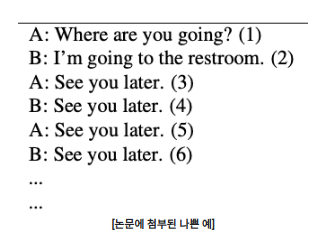

저자들은 좋은 대화를 정의하고 좋은 대화를 학습하게 모델을 설계했다. 
__1) 상대방이 답변하기 좋고, 2) 새로운 정보__를 담고 있으며, __3) 일관성이 있는 말__ 을 각각 보상으로 정의하여 __이를 최대화하는 방향으로 학습__ 을 진행했다. 

#### 3) 일관성이 있는 말
대화를 ```[ q1, a1, q2, a2, ... ]``` 라고 정의하고 ```q, a```는 각각 질문과 답변이다. ```a2```를 생성할 때에는 ```a1```과 ```q2```를 보고 생성을 하고, 해당 문장이 생성될 확률이 곧 보상이다. 하지만 ```모르겠어요 ```는 모든 질문에 대해 생성될 확률이 높은 문장이므로 자칫하면 ```a2``` 가 ```모르겠어요``` 여도 큰 보상을 줄 수 있다.

이 문제를 해결하기 위해 ```a2```를 보고 ```q2```를 유추할 수 있는지(Bidirectional)를 보상에 추가해 ```a2```가 ```q2```의 정보를 포함하지 않을 때 좋은 보상을 받을 수 없게 했다. 이를 통해 일관성 있는 대화를 생성하는 방향으로 학습이 진행되게 했다. 

## 11-13. 대표적인 챗봇
현재 가장 멋진 성능을 보여주고 있는 챗봇은 __딥러닝 기반__ 이다. __엄청난 규모의 데이터를 엄청난 크기의 모델에 학습시킨__ 챗봇이 선두주자이다.

### Meena
구글이 만든 챗봇. GPT-2보다 2배가량 큰 모델을 9배 더 많은 데이터로 학습. 모델 구조는 Evolved Transformer를 사용했고, 자체적인 __대화 평가 지표인 SSA__ 를 제안하고 이를 분석했다. 

- [무슨 대화든 할 수 있는 에이전트를 향하여](https://brunch.co.kr/@synabreu/35)

- SSA의 평가 과정

대화의 일관성을 위해 "Hi!" 로 대화를 시작하며, 이후 평가자는 챗봇이 생성한 발언에 대해 구체적인지와 합리적인지를 T/F로 평가한다.

### Blender
Facebook의 __Blender__ 는 모델에 페르소나를 부여하고자 하는 시도와 __자체적인 평가 지표 ACUTE-Eval__을 제안하였다.

- [[논문리뷰] 블렌더(Blender) - Facebook AI의 오픈 도메인 챗봇](https://littlefoxdiary.tistory.com/39)

- 모델 아키텍처     
Retrieval, Generative, Retrieve-and-refine의 세 타입 아키텍처를 고려하고 각각은 트랜스포머 구조를 사용한다. 

- Blended Skill Task    
모델에게 특정 부분에 대해 초점을 맞추고 학습하게 하는 방법

- 평가 지표 ACUTE-Eval
 
생성된 두 개의 긴 대화를 보고 평가자는 어떤 대화가 더 사람 같은지와 어떤 챗봇과 대화하고 싶은지를 양자택일로 평가한다.

오늘 배운 내용을 통해 Transformer에 Augmentation을 적용할 수도 있고, 성능을 BLEU로 측정할 수도 있다.